__<font size="5">PHASE 1 PROJECT</font>__ 

__<font size="5">Aviation Risk Assessment Analysis</font>__ 

- __<span style="font-size: 20px;">Business Understanding</span>__

__The Problem:__
 The company wants to start a new airplane business, but doesn't know which planes are safe to buy and operate. 

The head of the new airplane division needs clear information to decide which planes to purchase. I need to find out which airplanes have the fewest accidents and problems so the company can buy the safest ones first. 
- By picking the safest airplanes, the company can: save money, avoid disasters, and build a successful new business without taking unnecessary risks.

- __<span style="font-size: 20px;">Data Understanding</span>__


- __The Data Source:__ The analysis uses aviation accident data from Kaggle.
- __Time Period of dataset:__ This dataset has been collected from 1948 - 2022.
- __Data Limitations:__ The data set only includes reported accidents, the newer aircrafts have less historical data and it may not capture all operational factors affecting safety

The data provides the best available evidence for comparing aircraft safety and making informed purchasing decisions for our aviation business.

- __<span style="font-size: 20px;">Data Preparation</span>__


***<span style="font-size: 18px;">1. Importing Libraries</span>***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns

***<span style="font-size: 18px;">2. Loading the Data</span>***


- Get the zip path. Extract the contents.

In [2]:
zip_path = "AviationData.csv.zip"

# Extract contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_folder")

- Load the extracted dataset 

In [3]:
aviation_data = pd.read_csv("unzipped_folder/AviationData.csv", encoding='ISO-8859-1', low_memory=False)

- Viewing the rows

In [4]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


***<span style="font-size: 18px;">3. Cleaning Data Types </span>***


- Ensuring data types are in correct form


In [5]:
def fix_types(aviation_data):
    for col in aviation_data.columns:
        # Fix dates
        if 'date' in col.lower():
            aviation_data[col] = pd.to_datetime(aviation_data[col], errors='ignore')
        
        # Fix numbers
        elif any(word in col.lower() for word in ['total', 'number', 'id', 'injuries', 'engines']):
            aviation_data[col] = pd.to_numeric(aviation_data[col], errors='ignore')
    
    return aviation_data

***<span style="font-size: 18px;">4. Time Period of Dataset</span>***

- Getting the earliest date

In [6]:
aviation_data['Event.Date'].min() 

'1948-10-24'

- Getting the latest date

In [7]:
aviation_data['Event.Date'].max()

'2022-12-29'

***<span style="font-size: 18px;">5. Missing values </span>***


- checking number of rows and columns before handling them

In [8]:
aviation_data.shape

(88889, 31)

- Using .isnull().sum() to check numer of missing values

In [9]:
missing_values = aviation_data.isnull().sum()
missing_values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

- Checking missing values by columns using a horizontal bar chart

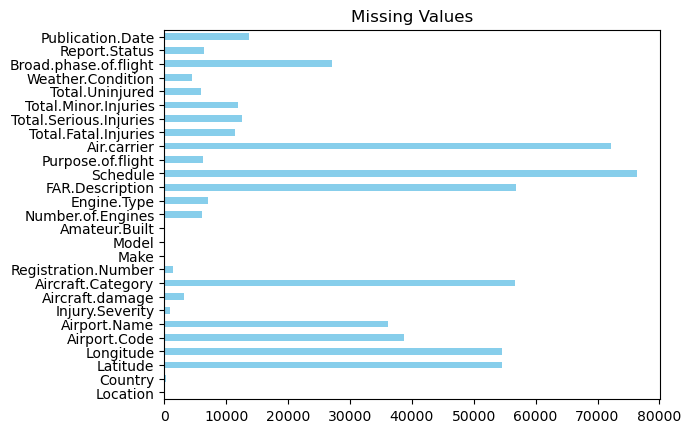

In [10]:
if missing_values.sum() > 0:
    missing_values[missing_values > 0].plot(kind='barh', color='skyblue')
    plt.title('Missing Values')
    plt.show()
else:
    print("No missing values!")

- Handling the missing values
- Data previously has 88889 rows 31 columns 

In [11]:
if aviation_data.isnull().values.any():
    # Drop columns with more than 50% missing values
    aviation_data = aviation_data.dropna(axis=1, thresh=len(aviation_data) * 0.5)

    # Fills numeric columns with median
    for col in aviation_data.select_dtypes('number'):
        aviation_data[col].fillna(aviation_data[col].median(), inplace=True)

    # Fills text columns with 'Unknown' instead
    for col in aviation_data.select_dtypes('object'):
        aviation_data[col].fillna('Unknown', inplace=True)

    # Drop rows missing 'Event.Date'
    aviation_data = aviation_data.dropna(subset=['Event.Date'])

    print("Missing values handled successfully!")
else:
    print("No missing values found!")


Missing values handled successfully!


- Checking no of rows and columns after they've been handled


In [12]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Unknown,Unknown,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Fatal(1),Destroyed,...,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


In [13]:
aviation_data.shape

(88889, 25)

- Checking the column names

In [14]:
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

***<span style="font-size: 18px;">6. Duplicates </span>***


- Checking for duplicates

In [15]:
aviation_data.duplicated().sum()

0

- Handling duplicates

In [16]:
aviation_data = aviation_data.drop_duplicates(subset=['Event.Id'])
aviation_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Unknown,Unknown,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Fatal(1),Destroyed,...,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Unknown,Unknown,Minor,Unknown,...,Unknown,Personal,0.0,1.0,0.0,0.0,Unknown,Unknown,Unknown,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,...,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,Personal,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown


***<span style="font-size: 18px;">7. Outliers </span>***

- Statistical summaries. 

In [17]:
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,87951.000000,87951.000000,87951.000000,87951.000000,87951.000000
mean,1.134711,0.552421,0.241248,0.308410,4.814215
std,0.429232,4.957053,1.440332,2.086752,25.752474
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


- Checking for outliers

In [18]:
def find_outliers(column):
    Q1 = aviation_data[column].quantile(0.25)
    Q3 = aviation_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = aviation_data[(aviation_data[column] < lower) | (aviation_data[column] > upper)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

In [19]:
# keeping Outliers in the dataset for analysis
numeric_cols = aviation_data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    find_outliers(col)

Number.of.Engines: 12968 outliers
Total.Fatal.Injuries: 17527 outliers
Total.Serious.Injuries: 12991 outliers
Total.Minor.Injuries: 15356 outliers
Total.Uninjured: 3969 outliers


- Visualizing outliars by plotting a histogram

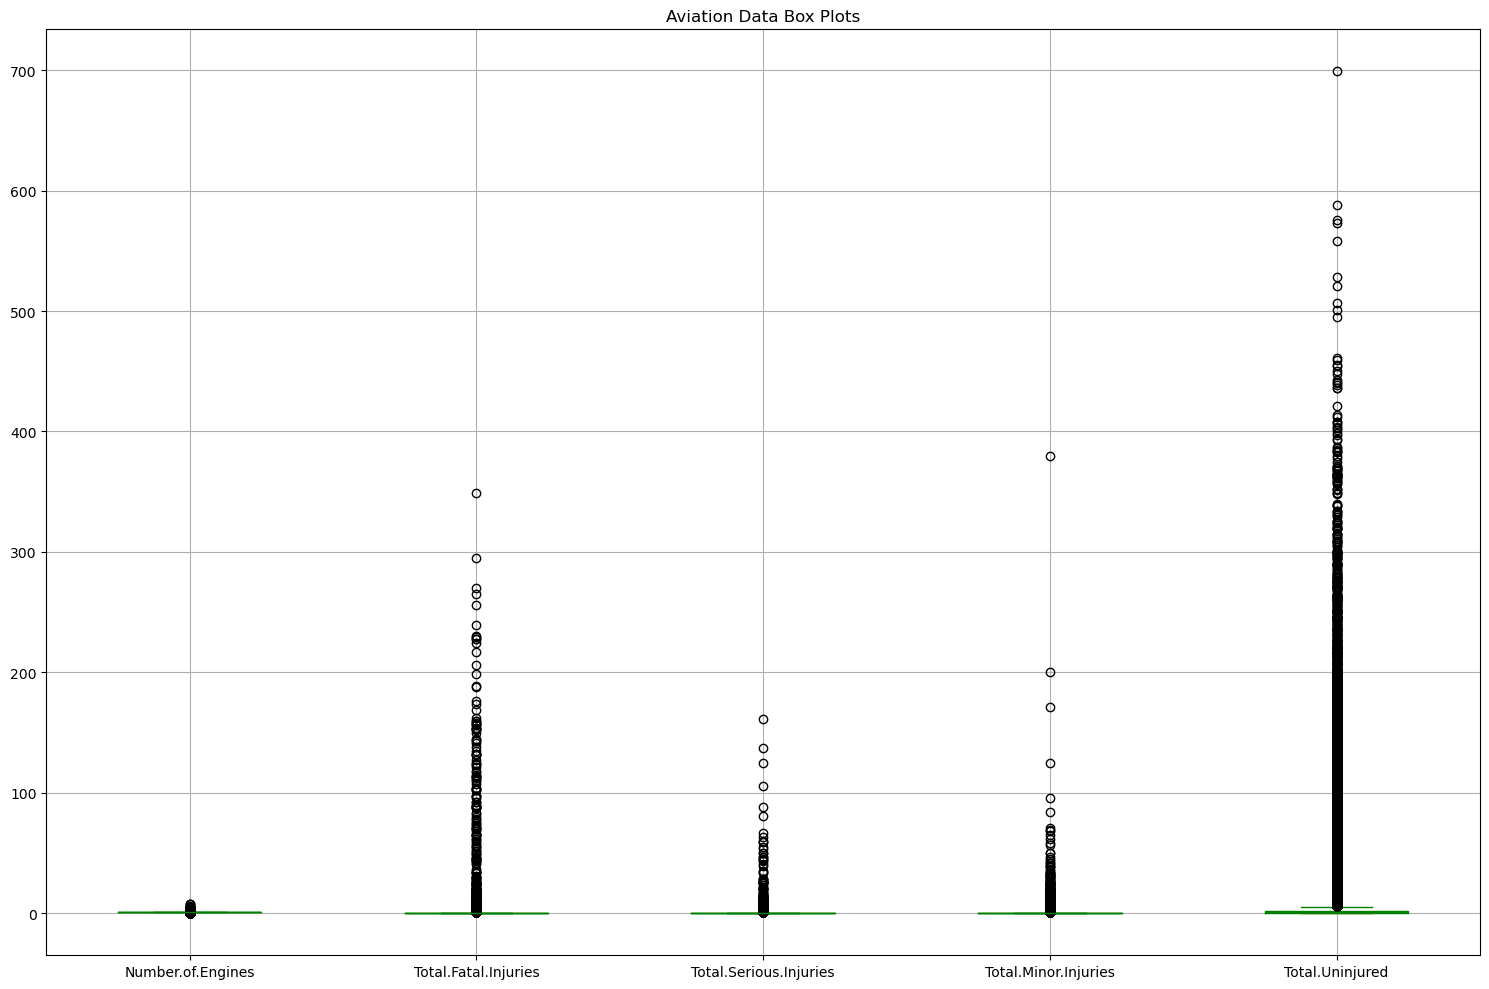

In [20]:
aviation_data.boxplot(figsize=(15, 10), vert=True, color='green')
plt.title('Aviation Data Box Plots')
plt.tight_layout()
plt.show()

***<span style="font-size: 18px;">8. Standardizing columns</span>***

In [21]:
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

- Standardizing the Country column


In [22]:
aviation_data['Country'] = aviation_data['Country'].replace({'US': 'USA', 'United States': 'USA'})
aviation_data['Country']

0        USA
1        USA
2        USA
3        USA
4        USA
        ... 
88884    USA
88885    USA
88886    USA
88887    USA
88888    USA
Name: Country, Length: 87951, dtype: object

- Standardizing Amateur Built column


In [23]:
aviation_data['Amateur.Built'] = aviation_data['Amateur.Built'].replace({'Y': 'Yes', 'N': 'No', 'UNK': 'Unknown'})
aviation_data['Amateur.Built']

0        No
1        No
2        No
3        No
4        No
         ..
88884    No
88885    No
88886    No
88887    No
88888    No
Name: Amateur.Built, Length: 87951, dtype: object

In [24]:
aviation_data['Weather.Condition'] = aviation_data['Weather.Condition'].replace({'Unk': 'UNK', 'Unknown': 'UNK'})
aviation_data['Weather.Condition']

0        UNK
1        UNK
2        IMC
3        IMC
4        VMC
        ... 
88884    UNK
88885    UNK
88886    VMC
88887    UNK
88888    UNK
Name: Weather.Condition, Length: 87951, dtype: object

- __<span style="font-size: 20px;">Data Analysis</span>__

***<span style="font-size: 18px;">9. Finding the Analysis and Plotting the Charts</span>***

- Calculating accident counts per aircraft

In [25]:
# Calculate accident counts per aircraft make and model
aircraft_accidents = aviation_data.groupby(['Make', 'Model']).size().reset_index(name='Total_Accidents')

# Create combined aircraft identifier
aircraft_accidents['Aircraft_Type'] = aircraft_accidents['Make'] + ' ' + aircraft_accidents['Model']

# Filter to aircraft with at least 5 accidents for meaningful analysis
significant_aircraft = aircraft_accidents[aircraft_accidents['Total_Accidents'] >= 5]

# Sort by accident count
significant_aircraft = significant_aircraft.sort_values('Total_Accidents', ascending=True)

print("Aircraft with Most/Fewest Accidents:")
print(significant_aircraft.tail(10))  # Highest risk
print(significant_aircraft.head(10))  # Lowest risk

Aircraft with Most/Fewest Accidents:
         Make      Model  Total_Accidents    Aircraft_Type
4872   CESSNA        172              499       CESSNA 172
5708   Cessna       150M              530      Cessna 150M
14889   Piper      PA-18              538      Piper PA-18
5778   Cessna       172P              582      Cessna 172P
5773   Cessna       172M              651      Cessna 172M
5684   Cessna        150              707       Cessna 150
14995   Piper  PA-28-140              805  Piper PA-28-140
5775   Cessna       172N              977      Cessna 172N
5731   Cessna        172             1241       Cessna 172
5709   Cessna        152             2114       Cessna 152
                    Make            Model  Total_Accidents  \
19996             Zenair          CH 2000                5   
3053               Beech             B-23                5   
12823              Maule              MX7                5   
12955  Mcdonnell Douglas            369HS                5   
1296

-  Plotting Top 20 Aircraft by Total Accidents

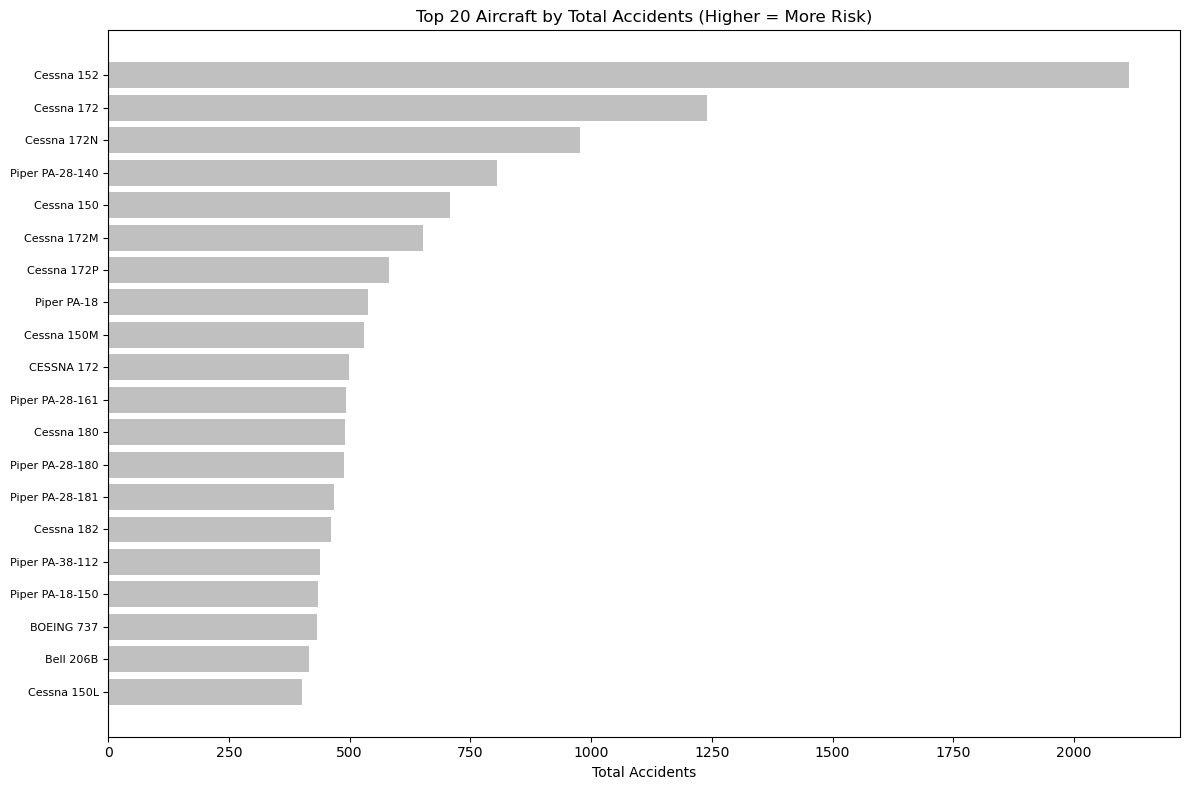

In [26]:
plt.figure(figsize=(12, 8))
top_20 = significant_aircraft.tail(20)
plt.barh(range(len(top_20)), top_20['Total_Accidents'], color='silver')
plt.yticks(range(len(top_20)), top_20['Aircraft_Type'], fontsize=8)
plt.xlabel('Total Accidents')
plt.title('Top 20 Aircraft by Total Accidents (Higher = More Risk)')
plt.tight_layout()
plt.show()

- Analyzing injury severity by aircraft type

In [27]:
# Analyze injury severity by aircraft type
severity_by_aircraft = aviation_data.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum', 
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum'
}).reset_index()

# Calculate fatality rate
severity_by_aircraft['Total_People'] = (severity_by_aircraft['Total.Fatal.Injuries'] + 
                                       severity_by_aircraft['Total.Serious.Injuries'] + 
                                       severity_by_aircraft['Total.Minor.Injuries'] + 
                                       severity_by_aircraft['Total.Uninjured'])

severity_by_aircraft['Fatality_Rate'] = (severity_by_aircraft['Total.Fatal.Injuries'] / 
                                        severity_by_aircraft['Total_People'] * 100)

# Filter aircraft with sufficient data
severity_filtered = severity_by_aircraft[severity_by_aircraft['Total_People'] >= 50]
severity_filtered = severity_filtered.sort_values('Fatality_Rate', ascending=False)

print("Aircraft with Highest/Lowest Fatality Rates:")
print(severity_filtered.head(10))

Aircraft with Highest/Lowest Fatality Rates:
         Make       Model  Total.Fatal.Injuries  Total.Serious.Injuries  \
2434   BOEING   777 - 206                 534.0                     0.0   
325    AIRBUS  A320 - 216                 162.0                     0.0   
4214   Boeing   B-757-23A                  70.0                     0.0   
3884   Boeing    -737-222                 123.0                     0.0   
1640      Atr  ATR-72-212                  68.0                     0.0   
520   ANTONOV       AN148                  71.0                     0.0   
561       ATR      72-500                  58.0                     0.0   
2482   BOEING       MD-83                 153.0                     0.0   
7734  Douglas       MD-83                  88.0                     0.0   
2300   BOEING   737 - 500                  50.0                     0.0   

      Total.Minor.Injuries  Total.Uninjured  Total_People  Fatality_Rate  
2434                   0.0              0.0         53

- Plotting Aircraft Damage Types

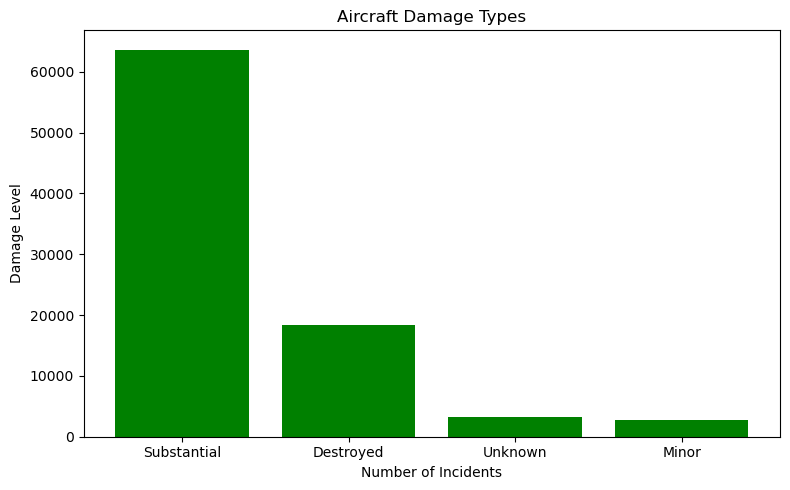

In [28]:
damage_counts = aviation_data['Aircraft.damage'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(damage_counts.index, damage_counts.values, color='green')
plt.title('Aircraft Damage Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Damage Level')
plt.tight_layout()
plt.show()

- Analyzing accidents by flight phase

In [29]:
# Analyze accidents by flight phase
phase_analysis = aviation_data.groupby('Broad.phase.of.flight').size().reset_index(name='Accident_Count')
phase_analysis = phase_analysis.sort_values('Accident_Count', ascending=False)

print("Accidents by Flight Phase:")
print(phase_analysis)

# Analyze phase risk by aircraft type (top aircraft only)
top_aircraft_makes = aviation_data['Make'].value_counts().head(10).index
phase_by_aircraft = aviation_data[aviation_data['Make'].isin(top_aircraft_makes)].groupby(['Make', 'Broad.phase.of.flight']).size().unstack(fill_value=0)

print("\nFlight Phase Risk by Top Aircraft Makes:")
print(phase_by_aircraft)

Accidents by Flight Phase:
   Broad.phase.of.flight  Accident_Count
11               Unknown           27661
5                Landing           15320
9                Takeoff           12404
2                 Cruise           10141
6            Maneuvering            8052
0               Approach            6389
1                  Climb            1995
3                Descent            1870
10                  Taxi            1786
4              Go-around            1345
8               Standing             872
7                  Other             116

Flight Phase Risk by Top Aircraft Makes:
Broad.phase.of.flight  Approach  Climb  Cruise  Descent  Go-around  Landing  \
Make                                                                          
BOEING                        0      0       0        0          0        0   
Beech                       598    174     723      158        140      909   
Bell                        136     33     414       42          3      218   
Boe

- Heatmap of phase risk by aircraft make

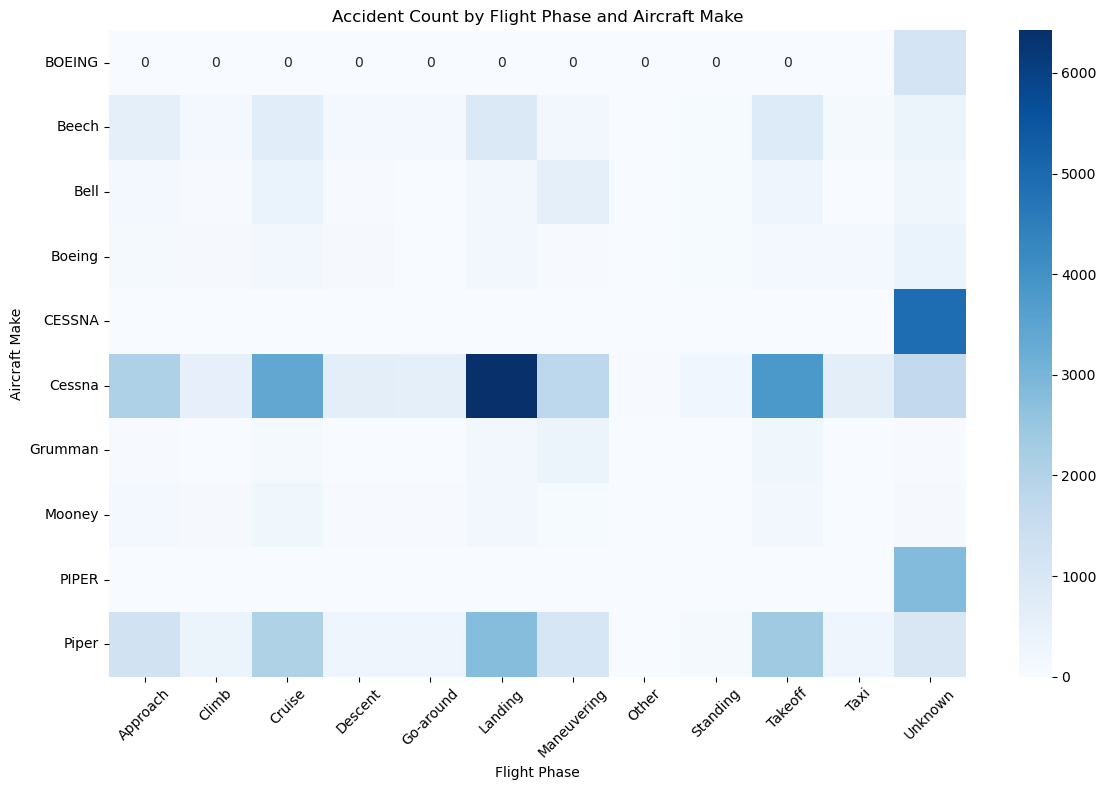

In [30]:
# Heatmap of phase risk by aircraft make
plt.figure(figsize=(12, 8))
sns.heatmap(phase_by_aircraft, annot=True, fmt='d', cmap='Blues')
plt.title('Accident Count by Flight Phase and Aircraft Make')
plt.xlabel('Flight Phase')
plt.ylabel('Aircraft Make')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Plotting the distribution of weather conditions

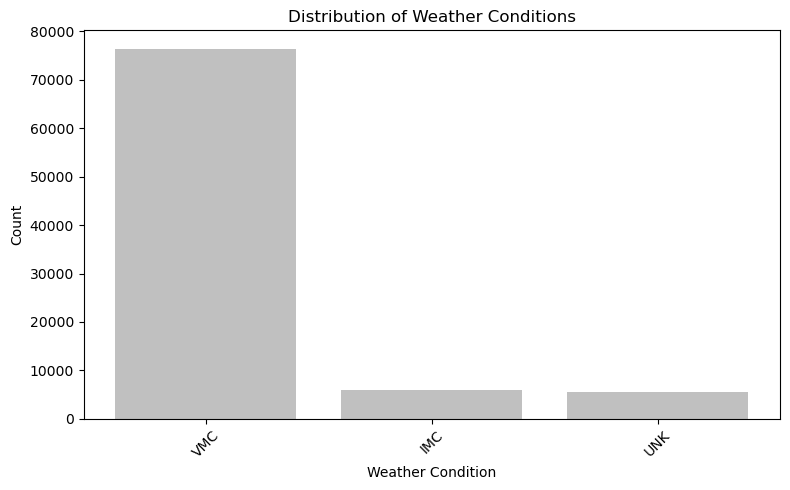

In [31]:
weather_counts = aviation_data['Weather.Condition'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(weather_counts.index, weather_counts.values, color='silver')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Plotting the engine type distribution

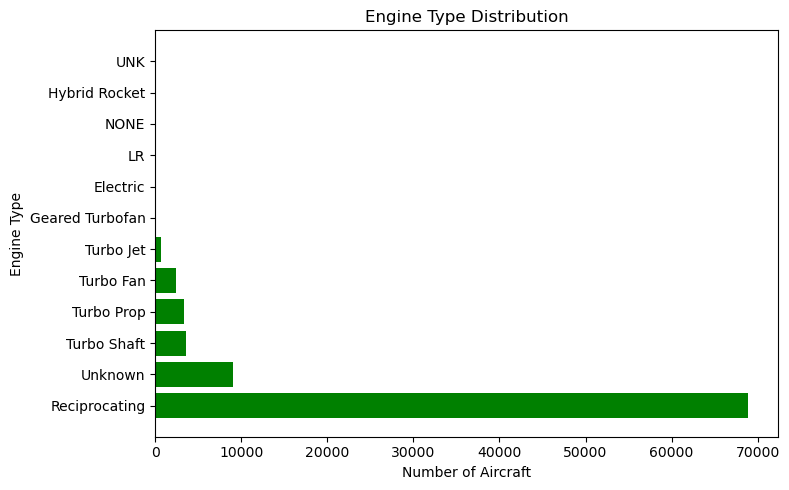

In [32]:
engine_counts = aviation_data['Engine.Type'].value_counts()

plt.figure(figsize=(8, 5))
plt.barh(engine_counts.index, engine_counts.values, color='green')
plt.title('Engine Type Distribution')
plt.xlabel('Number of Aircraft')
plt.ylabel('Engine Type')
plt.tight_layout()
plt.show()

***<span style="font-size: 18px;">10. Checking and saving the cleaned data</span>***


In [33]:
aviation_data.shape


(87951, 25)

- Saving the data


In [34]:
aviation_data.to_csv('cleaned_aviation_data.csv', index=False)
print("Cleaned data saved!")

Cleaned data saved!
